In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.utils.fixes import parse_version

In [6]:
# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}

In [10]:
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

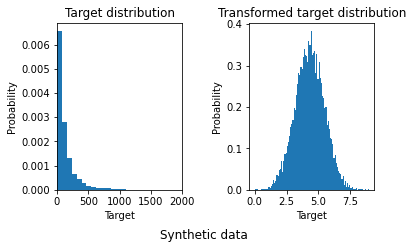

In [11]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, **density_param)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.06, x=0.53)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

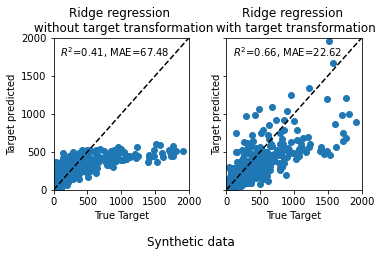

In [12]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
# Use linear model
regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# Plot results
ax0.scatter(y_test, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])
# Transform targets and use same linear model
regr_trans = TransformedTargetRegressor(regressor=RidgeCV(),
                                        func=np.log1p,
                                        inverse_func=np.expm1)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ax1.scatter(y_test, y_pred)
ax1.plot([0, 2000], [0, 2000], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Ridge regression \n with target transformation')
ax1.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax1.set_xlim([0, 2000])
ax1.set_ylim([0, 2000])

f.suptitle("Synthetic data", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [31]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,1457.0,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,1458.0,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,1459.0,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [13]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import QuantileTransformer, quantile_transform

ames = fetch_openml(name="house_prices", as_frame=True)
# Keep only numeric columns
X = ames.data.select_dtypes(np.number)
# Remove columns with NaN or Inf values
X = X.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'])
y = ames.target
y_trans = quantile_transform(y.to_frame(),
                             n_quantiles=900,
                             output_distribution='normal',
                             copy=True).squeeze()

In [30]:
y_trans.shape

(1460,)

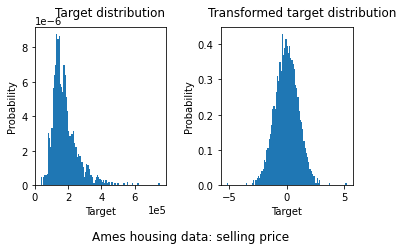

In [32]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, **density_param)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.text(s='Target distribution', x=1.2e5, y=9.8e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.text(s='Transformed target distribution', x=-6.8, y=0.479, fontsize=12)

f.suptitle("Ames housing data: selling price", y=0.04)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

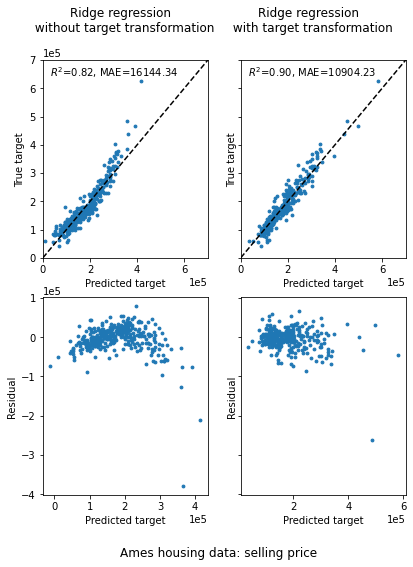

In [33]:
f, (ax0, ax1) = plt.subplots(2, 2, sharey='row', figsize=(6.5, 8))

regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter(y_pred, y_test, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], '--k')
ax0[0].set_ylabel('True target')
ax0[0].set_xlabel('Predicted target')
ax0[0].text(s='Ridge regression \n without target transformation', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[0].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel('Residual')
ax1[0].set_xlabel('Predicted target')
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=900,
                                    output_distribution='normal'))
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ax0[1].scatter(y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], '--k')
ax0[1].set_ylabel('True target')
ax0[1].set_xlabel('Predicted target')
ax0[1].text(s='Ridge regression \n with target transformation', x=-5e4,
            y=8e5, fontsize=12, multialignment='center')
ax0[1].text(3e4, 64e4, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))
ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel('Residual')
ax1[1].set_xlabel('Predicted target')
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()